---
# **Bellabeat Case Study: How Can a Wellness Technology Company Play It Smart?**
Alexander Kalita
---

# **Introduction**

Bellabeat is a small, high-tech manufacturer that focuses on wellness products designed specifically for women's health. Since 2013 the company experienced a rapid growth and aims to expand in the global smart device market. The company offers an ecosystem of diverse products that are tied to the Bellabeat app in order to understand how can users make more informed health decisions in their daily lives. Urška Sršen, the cofounder and Chief Creative Officer of the company, mentions the importance of analyzing Bellabeat smart device fitness data to guide marketing strategy and seize further growth opportunities.

The current research aims to analyze the provided dataset and give some recommendations on the key trends for the Bellabeat management team. Therefore, the following research questions could be stated:

• What are some trends in smart device usage?

• How could these trends apply to Bellabeat customers?

• How could these trends help influence Bellabeat marketing strategy?

# **Data source and data cleaning**

This section is divided into two parts. At first, the data source is briefly outlined and then detailed data processing is presented.

## **Data Source**

The data used in this study is publicly available through Kaggle platform: FitBit Fitness Tracker Data. It was collected by Amazon Mechanical Turk between 03.12.2016-05.12.2016. This dataset consists of information about 30 users devoted to physical activity, sleeping patterns and heart rate. The data has some limitations: the data was collected in a single period of time, the sample is quite small (n=30) and it is not representative of the whole fitness tracker population. Despite its limitations, the data can be used to make a preliminary analysis of the smart device usage trends and its application to Bellabeat customers and marketing strategy.

## **Processing data**

With previously installed packages, the following libraries are loaded in RStudio:

In [1]:
# Loading libraries
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(skimr)
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




After preliminary analysis, the research focuses on three datasets by reading them as CSV files:

In [2]:
# Reading CSV files
daily_activity <- read.csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_steps <- read.csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
daily_sleep <- read.csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

The used str() function provided some information about the internal data structure. This data was doublechecked in Google sheets.

In [3]:
# Exploring the datasets
str(daily_activity)
str(daily_sleep)
str(hourly_steps)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

It was important to distinguish unique users in each dataset.

In [4]:
# Summarizing distinct users
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id) 
n_distinct(hourly_steps$Id)

[1] 33

[1] 24

[1] 33

The date format is not consistent throughout the datasets, so the runned code helps to fix this. At first glance, the "daily_activity" code did not change much but the initial date format was m/dd/YYYY, not mm/dd/YYYY. It prevents further file merge for analysis.

In [5]:
# Fixing date consistency
daily_activity$ActivityDate <- format(strptime(daily_activity$ActivityDate, "%m/%d/%Y"), "%m/%d/%Y")
head(daily_activity$ActivityDate)

daily_sleep$SleepDay <- format(strptime(daily_sleep$SleepDay, "%m/%d/%Y %I:%M:%S %p"), "%m/%d/%Y")
head(daily_sleep$SleepDay)

hourly_steps$ActivityHour=as.POSIXct(hourly_steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz="UTC")
head(hourly_steps$ActivityHour)

[1] "04/12/2016" "04/13/2016" "04/14/2016" "04/15/2016" "04/16/2016"
[6] "04/17/2016"

[1] "04/12/2016" "04/13/2016" "04/15/2016" "04/16/2016" "04/17/2016"
[6] "04/19/2016"

[1] "2016-04-12 00:00:00 UTC" "2016-04-12 01:00:00 UTC"
[3] "2016-04-12 02:00:00 UTC" "2016-04-12 03:00:00 UTC"
[5] "2016-04-12 04:00:00 UTC" "2016-04-12 05:00:00 UTC"

The date/time columns are renamed in the datasets.

In [6]:
 # Renaming columns
daily_activity <- rename (daily_activity, date = ActivityDate)
colnames(daily_activity)

daily_sleep <- rename (daily_sleep, date = SleepDay)
colnames(daily_sleep)

hourly_steps <- rename (hourly_steps, date_time = ActivityHour)
colnames(hourly_steps)

[1] "Id"                       "date"                    
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "date"               "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"        "date_time" "StepTotal"

Two files are merged: "daily_activity" and "daily_sleep" datasets. They will be further used for designing box plots and correlation analysis.

In [7]:
# Merging datasets
daily_activitySleep <- merge(daily_activity, daily_sleep, by=c("Id", "date"))
head(daily_activitySleep$Id)
head(daily_activitySleep$date)

[1] 1503960366 1503960366 1503960366 1503960366 1503960366 1503960366

[1] "04/12/2016" "04/13/2016" "04/15/2016" "04/16/2016" "04/17/2016"
[6] "04/19/2016"

A new dataset includes four activity types in one column.

In [8]:
# Grouping users in four categories
activity_type_data <- daily_activitySleep %>%
  summarise(
    activity_type = factor(case_when(
      SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary Active",
      SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
      SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
      SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
    ),levels=c("Sedentary Active", "Lightly Active", "Fairly Active", "Very Active")), TotalMinutesAsleep, group=Id)%>%
  drop_na()

The date and time columns are separated apart because time will be used as a key variable to group data for histogram in the next section.

In [9]:
# Separating date and time columns
hourly_steps <- separate(hourly_steps, date_time, into=c("date", "time"), sep= " ")
head(hourly_steps)

,Id,date,time,StepTotal
,<dbl>,<chr>,<chr>,<int>
1,1503960366,2016-04-12,00:00:00,373
2,1503960366,2016-04-12,01:00:00,160
3,1503960366,2016-04-12,02:00:00,151
4,1503960366,2016-04-12,03:00:00,0
5,1503960366,2016-04-12,04:00:00,0
6,1503960366,2016-04-12,05:00:00,0


# **What does the data tell us?**

The section presents basic descriptive statistics of the key variables and some important data visualizations.

## **Descriptive statistics**

Analyzing the descriptive statistics reveals some interesting findings:

• The average user walks 7,638 steps per day, while healthcare experts recommend 10,000 daily steps for healthy lifestyle [1,2];

• Sedentary activities, on average, constitute 991,2 minutes or 16,5 hours of user's time;

• On average, there are much more lightly active users with 192,8 minutes (3,21 hours) compared to fairly active and very active respondents;

• User total sleep duration is 419,5 minutes which equals 7 hours and is in line with the healthcare experts recommendations for adults [3].


In [10]:
 # Summarizing total daily steps and activity level
daily_activity %>%
  select(TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes ) %>%
  summary()

# Summarizing Steps counted per hour
hourly_steps %>%
  select(StepTotal) %>%
  summary()

# Summarizing total sleep duration in minutes
daily_sleep %>%
  select(TotalMinutesAsleep) %>%
summary()

   TotalSteps    VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :    0   Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.: 3790   1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median : 7406   Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 7638   Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.:10727   3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :36019   Max.   :210.00    Max.   :143.00      Max.   :518.0       
 SedentaryMinutes
 Min.   :   0.0  
 1st Qu.: 729.8  
 Median :1057.5  
 Mean   : 991.2  
 3rd Qu.:1229.5  
 Max.   :1440.0  

   StepTotal      
 Min.   :    0.0  
 1st Qu.:    0.0  
 Median :   40.0  
 Mean   :  320.2  
 3rd Qu.:  357.0  
 Max.   :10554.0  

 TotalMinutesAsleep
 Min.   : 58.0     
 1st Qu.:361.0     
 Median :433.0     
 Mean   :419.5     
 3rd Qu.:490.0     
 Max.   :796.0     

## **Data visualization**

The histogram in Figure 1 shows the average steps made by users per hour in a day. It can be seen that more than 500 average hourly steps are performed from 12 pm to 2 pm as well as from 5 pm to 7 pm. The former time period refers to the lunch break at work, while the latter time period is the end of the working day. This is vital information for Bellabeat marketing strategy.

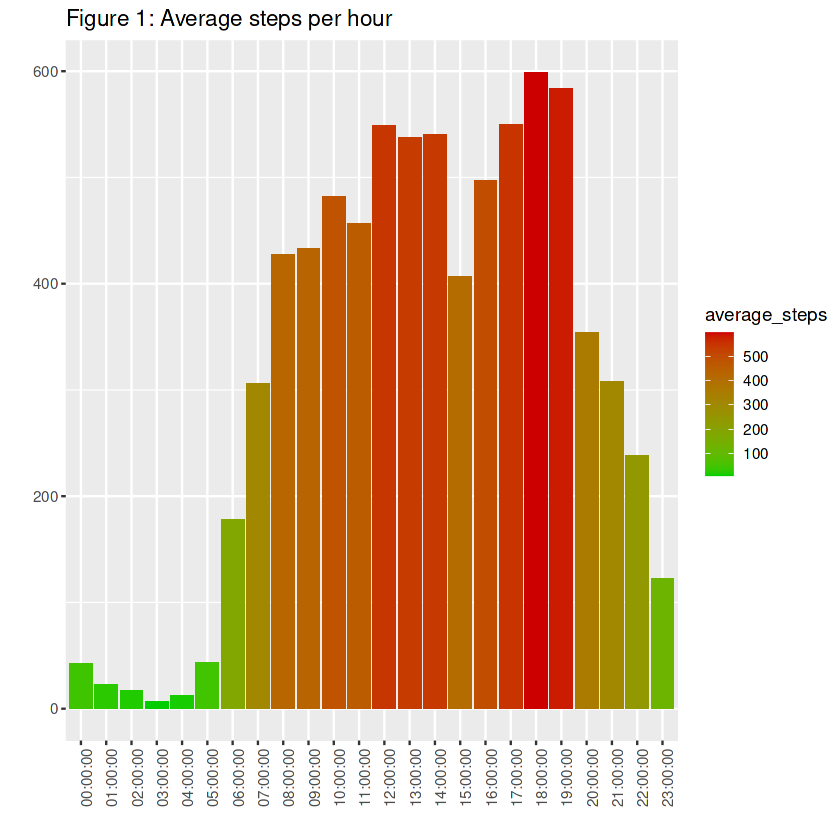

In [11]:
# Histogram: Average steps per hour in a day 
hourly_steps %>% 
  group_by(time) %>% 
  summarize(average_steps = mean(StepTotal)) %>% 
  ggplot() + 
  geom_col(mapping = aes(x=time, y = average_steps, fill = average_steps)) + 
  labs(title = "Figure 1: Average steps per hour", x="", y="") +
  scale_fill_gradient(low ="green3", high = "red3")+
  theme(axis.text.x = element_text(angle = 90))

In figure 2, the data indicates that users are quite different in terms activity type and sleep duration. For instance, lightly active users are the ones who sleep approximately 500 minutes or 8,33 hours per day, slightly more compared to other categories of activity type users. The small shape of the lightly active user boxplot reveals that there is minimal difference between lightly active user's responses, concerning their daily sleeping minutes.

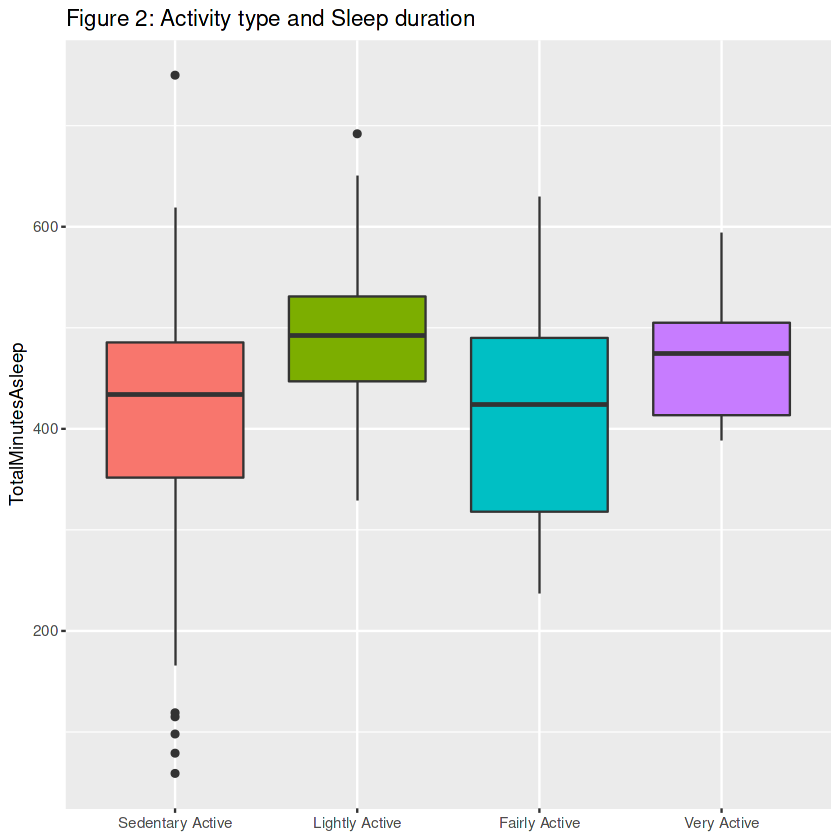

In [12]:
# Boxplot: Activity type and Sleep duration
ggplot(activity_type_data, aes(activity_type, TotalMinutesAsleep, fill=activity_type)) + 
  geom_boxplot() + 
  labs(title="Figure 2: Activity type and Sleep duration", x=NULL) +
  theme(legend.position="none")

There is a negative correlation between Sedentary activities and Sleep duration (see Figure 3). This means that physically inactive users sleep less. However, the research with large sample sizes and advanced methods shows that such relationships are not that clear outlining the importance of future research in the area [4,5]. Therefore, please interpret this finding with caution by taking into account its limitations.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



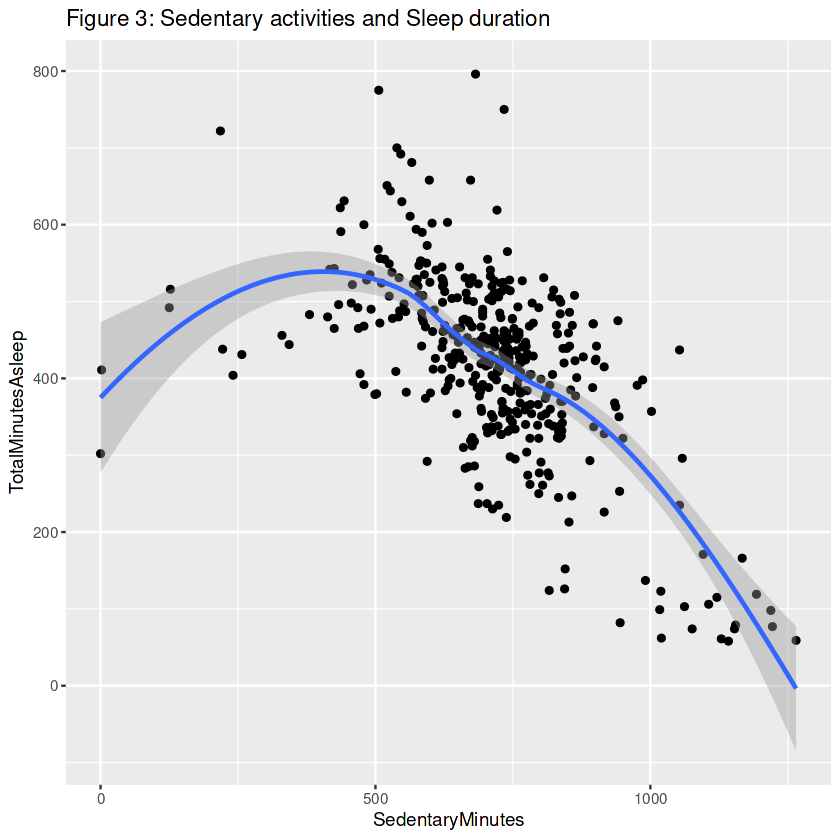

In [13]:
 # Scatterplot: Sedentary activities and Sleep duration
ggplot(data=daily_activitySleep, aes(x=SedentaryMinutes, y=TotalMinutesAsleep)) + 
  geom_point() + 
  geom_smooth() + 
  labs(title="Figure 3: Sedentary activities and Sleep duration")

# **Conclusions and recommendations**

Based on the data analysis, there are some important recommendations for Bellabeat company.

**High sedentary activities of users**. It should be mentioned that 991,2 minutes or 16,5 hours of respondent's time, on average, is spend on sedentary activities such as working, sitting in front of computer, and using smartphones. If Bellabeat plans further profitable growth they should find ways to make the respondents devote some time to healthy lifestyle which will cause more frequent engagement in Bellabeat app. One possible solution seems to send notifications for women to make at least five minutes exercises but 5 days per week in order to achieve cumulative effect.

**Somewhat active users**. On average, users walk 7,638 steps per day which is considered as somewhat active level and is slightly below the 10,000 daily steps recommended by healthcare experts for healthy lifestyle [1,2]. The management of Bellabeat can use this information to encourage women setting such goals with the possibility to interact and share their achievements with other Bellabeat app users. It is also vital to think about bonuses and prizes for high performers.

**Hourly steps time period**. Users, on average, prefer to make hourly steps during the lunch time period 12 pm-2 pm as well as at 5 pm–7 pm when their standard working hours end. Sending daily notifications for exercise seems vital in both time intervals. In addition, motivation letters and key statistics of user performance will be helpful as indicators of the importance performing daily exercises.

**Activity type users are heterogeneous in sleep duration**. The findings indicate that users defined by activity type are quite different in terms of their daily sleep duration. This information can be used by Bellabeat management team to target users who wish to set up a balanced activity type and sleep duration habits. Probably a personalized program can be developed.

**Sedentary activities may reduce sleep duration**. The analyzed data shows sedentary activities are negatively correlated with users sleep duration measured as total minutes asleep. This preliminary finding can be used to direct the Bellabeat marketing strategy for women who plan to start healthy lifestyle but need some motivation and additional information to pursue this path. The result should be interpreted with caution due to sample and method limitations. Future research in this area is highly recommended by using large-scale time-series dataset which can be collected by Bellabeat in close collaboration with specialized healthcare research institutes.

# **List of References**

1.https://www.10000steps.org.au/articles/healthy-lifestyles/counting-steps/ [accessed date: 16.11.2022].

2.https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day#for-general-health [accessed date: 16.11.2022].

3.https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html [accessed date: 16.11.2022].

4.Lakerveld J., Mackenbach J.D., Horvath E., Rutters F., Compernolle S., Bárdos H., Bourdeaudhuij I.D., Charreire H., Rutter H., Oppert J-M., McKee M., Brug J. (2016). The relation between sleep duration and sedentary behaviours in European adults. *Obesity Reviews*, **17**(Suppl., 1): 62-67.

5.Creasy S.A., Crane T.E., Garcia D.O., Thomson C.A., Kohler L.N., Wertheim B.C., Baker L.D., Coday M., Hale L., Womack C.R., Wright Jr. K.P., Melanson E.L. (2019). Higher amounts of sedentary time are associated with short sleep duration and poor sleep quality in postmenopausal women. *Sleep*, **42**(7): 1-9.